### Handling missing value

Missing value in a dataset is a very common phenomenon in reality. For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders.Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements or data unavailability.

Missing value correction is required to reduce bias and to produce powerful suitable models. Most of the algorithms can’t handle missing data, thus you need to act in some way to simply not let your code crash

There are four qualitatively distinct types of missing data. Missing data is either: structurally missing, missing completely at random (MCAR), missing at random, or nonignorable (also known as missing not at random). Different types of missing data need to be treated differently in order for any analysis to be meaningful.

### Structurally missing data

Structurally missing data is data that is missing for a logical reason. In other words, it is data that is missing because it should not exist. In the table below, the first and third observations have missing values for Age of youngest child. This is because these people have no children. In the How many colas did you drink in the past 24 hours column, there are also structurally missing values. In this case, we can logically deduce that the correct value is 0, so this value should be used in place of the missing values in our analysis.
 
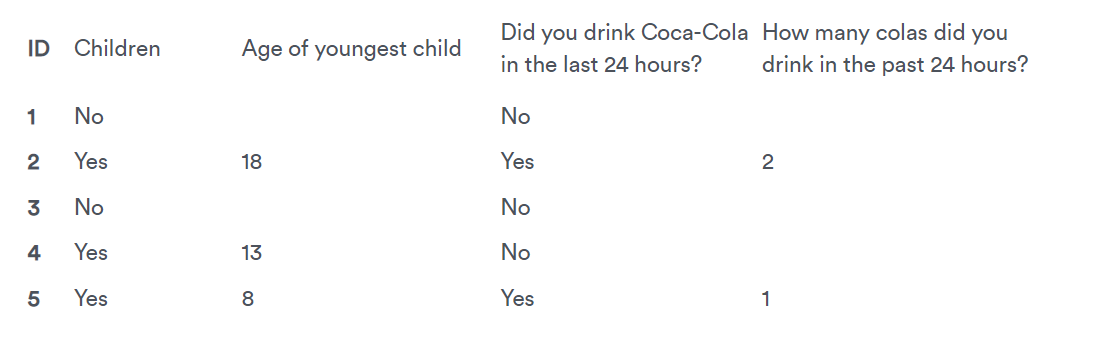


### Missing completely at random (MCAR)

Looking at the table below, we need to ask ourselves: what is the likely income of the fourth observation? The simplest approach is to note that 50% of the other people have high incomes and 50% have low incomes. We could assume, therefore, that there is a 50% chance she has a high income and a 50% chance she has a low income. This is known as assuming that the missing value is missing completely at random (MCAR). When we make this assumption, we are assuming that whether or not the person has missing data is completely unrelated to the other information in the data.

### Missing at random (MAR)

In the case of missing completely at random, the assumption was that there was no pattern. An alternative assumption, known somewhat confusingly as missing at random (MAR) instead assumes that we can predict the value that is missing based on the other data.We use this assumption to return to the problem of trying to work out the value of the fourth observation on income. A simple predictive model is that income can be predicted based on gender and age. Looking at the table below, which is the same as the one above, we note that our missing value is for a Female aged 30 or more, and the other females aged 30 or more have a High income. As a result, we can predict that the missing value should be High. Note that the idea of prediction does not mean we can perfectly predict a relationship. All that is required is a probabilistic relationship (i.e., that we have a better than random probability of predicting the true value of the missing data).
When data is missing at random, it means that we need to either use an advanced imputation method, such as multiple imputation, or an analysis method specifically designed for missing at random data.

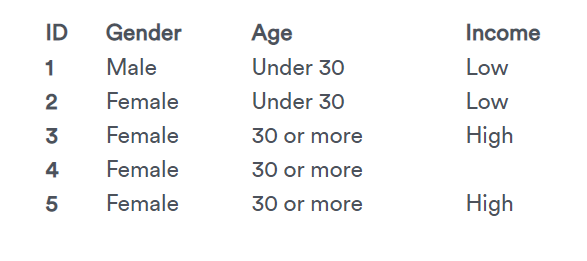

### Missing not at random (nonignorable)

It may be the case that we cannot confidently make any conclusions about the likely value of missing data. For example, it is possible that people with very low incomes and very high incomes tend to refuse to answer. Or there could be some other reason we just do not know. This is known as missing not at random data and also as nonignorable missing data.
It is common to include structural missing data as a special case of data that is missing not at random. However, this misses an important distinction. Structurally missing data is easy to analyze, whereas other forms of missing not at random data are highly problematic.
When data is missing, not at random, it means that we cannot use any of the standard methods for dealing with missing data (e.g., imputation, or algorithms specifically designed for missing values). If the missing data is missing, not at random, any standard calculations give the wrong answer

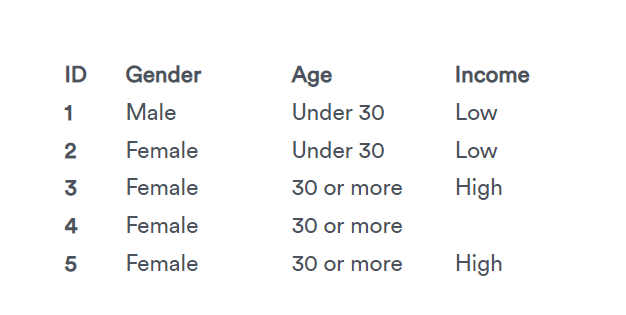


### Detection of Missing Data

#### With Python Code

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymongo
import json
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [33]:
data=pd.read_csv("Home_Credit_Default_Risk1.csv")

In [35]:
data.shape


(10000, 122)

In [39]:
profile = ProfileReport(data2, title="Pandas Profiling Report")

In [40]:
profile.to_widgets()

In [41]:
data2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [34]:
data2=pd.read_csv("titanic.csv")

In [38]:
data2.shape

(891, 12)

In [4]:
data.shape

(10000, 122)

In [42]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
data2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data_sample=data.head(1000)

In [25]:
data_sample.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     142
AMT_REQ_CREDIT_BUREAU_WEEK    142
AMT_REQ_CREDIT_BUREAU_MON     142
AMT_REQ_CREDIT_BUREAU_QRT     142
AMT_REQ_CREDIT_BUREAU_YEAR    142
Length: 122, dtype: int64

In [20]:
data_sample.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED               

In [27]:
df_missing=data_sample['AMT_REQ_CREDIT_BUREAU_YEAR']

In [7]:
data_sample.describe()

SK_ID_CURR       TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count    1000.00000  1000.000000   1000.000000      1.000000e+03   
mean   275775.27400     0.094000      0.424000      1.694280e+05   
std    102141.79255     0.291975      0.718847      9.607930e+04   
min    100096.00000     0.000000      0.000000      2.700000e+04   
25%    186390.25000     0.000000      0.000000      1.125000e+05   
50%    275899.50000     0.000000      0.000000      1.485000e+05   
75%    360614.50000     0.000000      1.000000      2.025000e+05   
max    455824.00000     1.000000      4.000000      1.035000e+06   

         AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  1.000000e+03   1000.00000     9.990000e+02                 1000.000000   
mean   5.870398e+05  26526.07800     5.290321e+05                    0.020339   
std    3.988823e+05  13775.83604     3.641716e+05                    0.013782   
min    4.500000e+04   3172.50000     4.500000e+04                    0.000533   
25%    2.700000e+05  16439.62500     2.385000e+05                    0.009919   
50%    5.013540e+05  24441.75000     4.500000e+05                    0.018801   
75%    7.982021e+05  33274.12500     6.750000e+05                    0.026392   
max    2.695500e+06  91570.50000     2.250000e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count   1000.000000    1000.000000  ...       1000.000000            1000.0   
mean  -15995.389000   69904.701000  ...          0.008000               0.0   
std     4459.663397  145904.799372  ...          0.089129               0.0   
min   -24944.000000  -14513.000000  ...          0.000000               0.0   
25%   -19835.750000   -2411.750000  ...          0.000000               0.0   
50%   -15546.000000   -1072.000000  ...          0.000000               0.0   
75%   -12476.250000    -237.500000  ...          0.000000               0.0   
max    -7778.000000  365243.000000  ...          1.000000               0.0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count            1000.0       1000.000000                  858.000000   
mean                0.0          0.001000                    0.003497   
std                 0.0          0.031623                    0.059062   
min                 0.0          0.000000                    0.000000   
25%                 0.0          0.000000                    0.000000   
50%                 0.0          0.000000                    0.000000   
75%                 0.0          0.000000                    0.000000   
max                 0.0          1.000000                    1.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                 858.000000                  858.000000   
mean                    0.003497                    0.030303   
std                     0.059062                    0.178193   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     1.000000                    2.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                 858.000000                 858.000000   
mean                    0.291375                   0.233100   
std                     1.288653                   0.550146   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    24.000000                   3.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                  858.000000  
mean                     1.909091  
std                      1.842361  
min    

In [10]:
data_sample.notnull().sum()

SK_ID_CURR                    1000
TARGET                        1000
NAME_CONTRACT_TYPE            1000
CODE_GENDER                   1000
FLAG_OWN_CAR                  1000
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY      858
AMT_REQ_CREDIT_BUREAU_WEEK     858
AMT_REQ_CREDIT_BUREAU_MON      858
AMT_REQ_CREDIT_BUREAU_QRT      858
AMT_REQ_CREDIT_BUREAU_YEAR     858
Length: 122, dtype: int64

### With Visulization also we can detect there is missing value or not

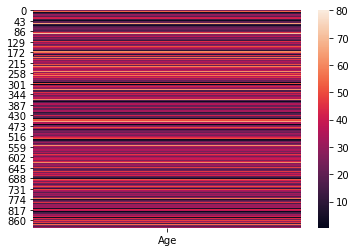

In [45]:
import seaborn
seaborn.heatmap(pd.DataFrame(data2['Age']))

In [46]:
import seaborn
seaborn.heatmap(data2)

TypeError: '<=' not supported between instances of 'int' and 'str'

In [48]:
data2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Heatmap

In [ ]:
import missingno as msno

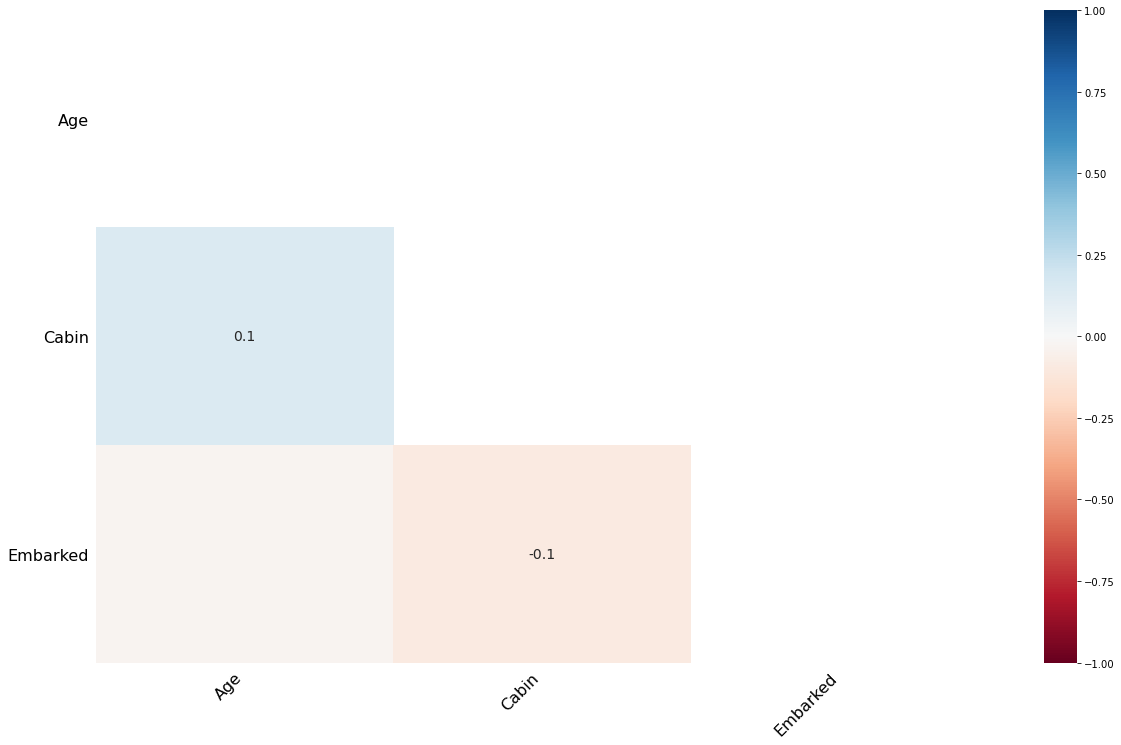

In [47]:
msno.heatmap(data2)

In [31]:
pd.DataFrame(df_missing)

AMT_REQ_CREDIT_BUREAU_YEAR
0                           NaN
1                           9.0
2                           1.0
3                           2.0
4                           5.0
..                          ...
995                         2.0
996                         NaN
997                         2.0
998                         1.0
999                         2.0

[1000 rows x 1 columns]

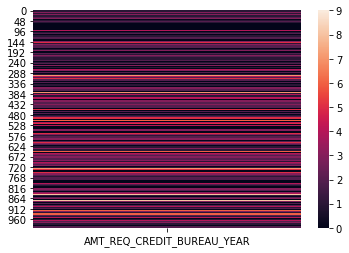

In [32]:
import seaborn
seaborn.heatmap(pd.DataFrame(df_missing))

#### Bar Chart

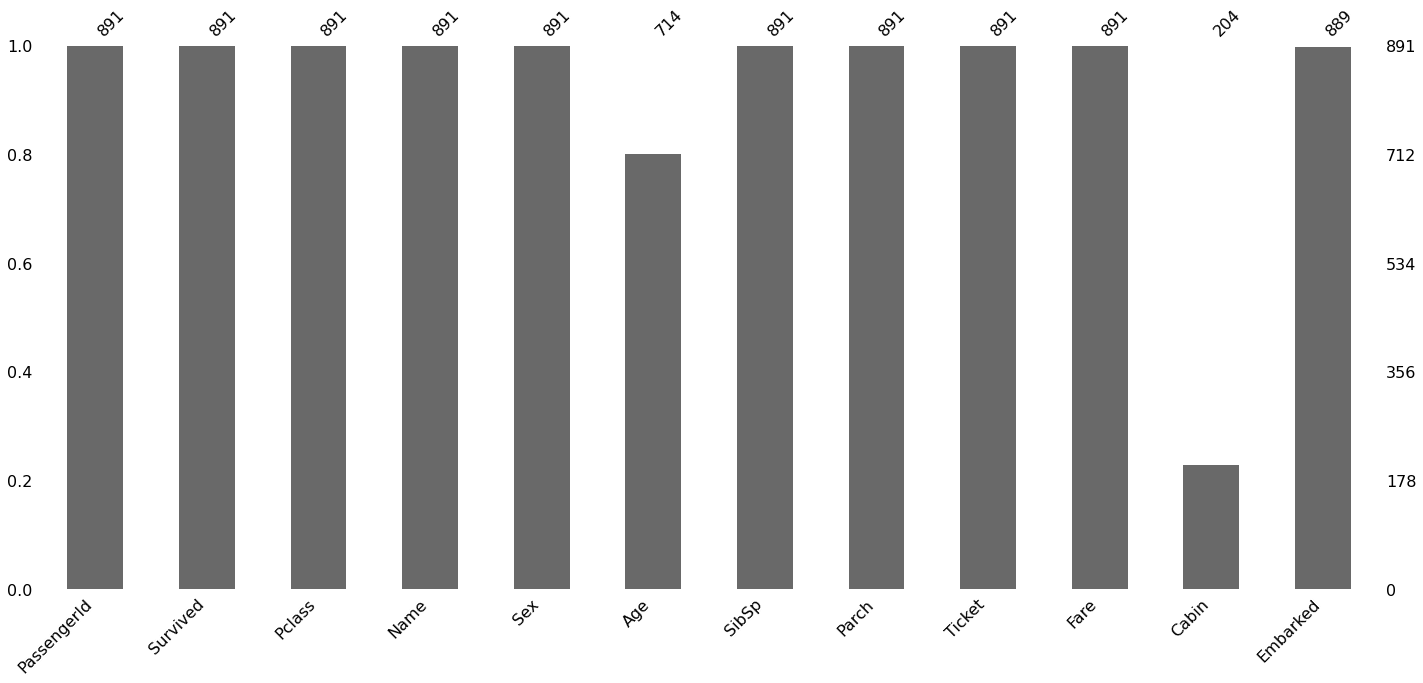

In [49]:
msno.bar(data2)

#### Matrix

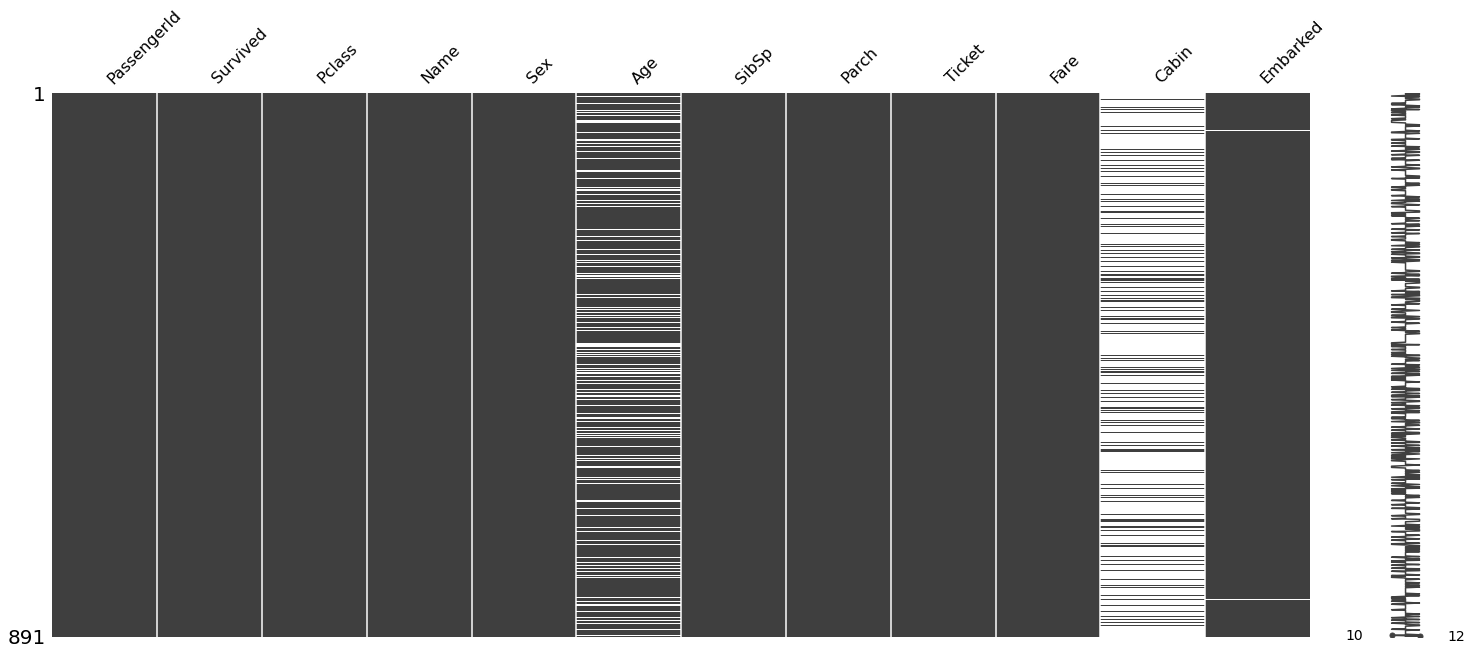

In [50]:
msno.matrix(data2)


#### Dendrogram

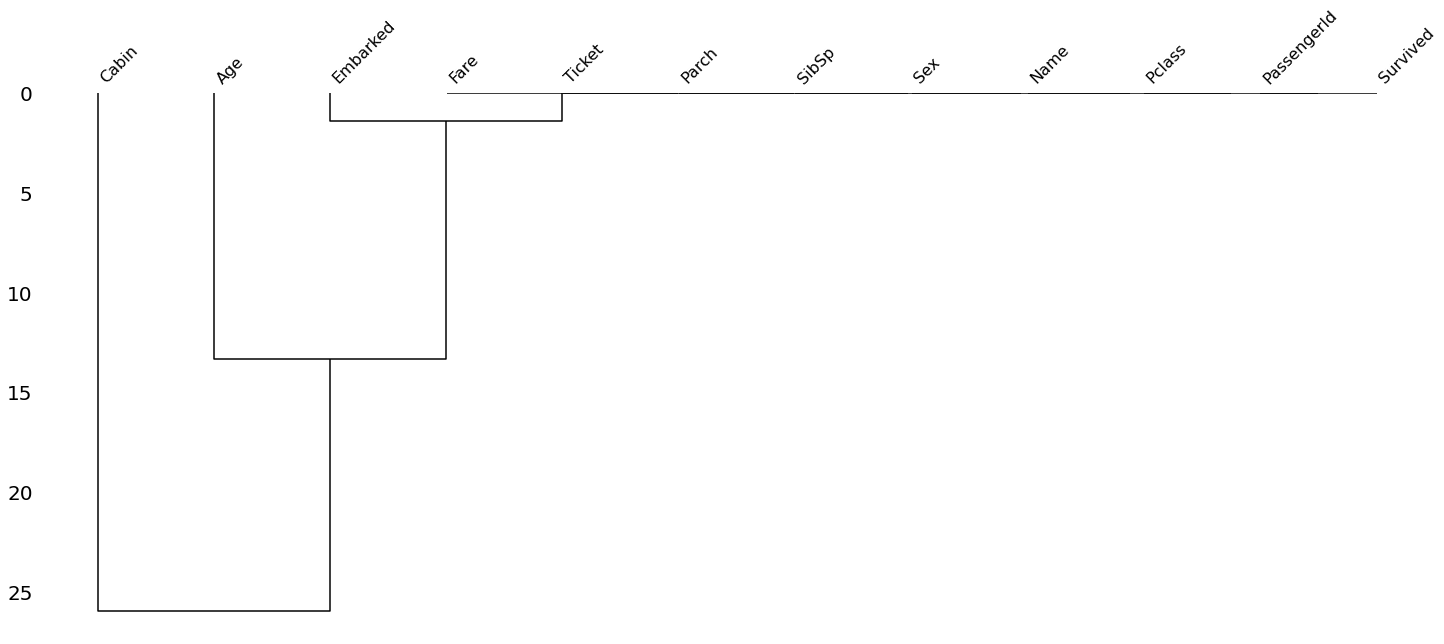

In [51]:
msno.dendrogram(data2)

### pandas porfiling will give the entire analysis

In [11]:
### To Create the Simple report quickly
profile = ProfileReport(data_sample, title='Pandas Profiling Report', explorative=True)



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
profile.to_widgets()

In [ ]:

profile.to_notebook_iframe()

profile.to_file("output.html")


### Method for handling missing values

1.Filling with Arbitrary value or Replace NaN with a Scalar Value

2.Filing Nan with pad/fill(Fill methods Forward) and bfill/backfill(Fill methods Backward)

3.Drop Missing Values

4.statical method

  - mean 

  - median 

  - mode

5.Capturing NAN values with a new feature

6.End of Distribution imputation

7.using different model(knn imputer) or  Predicting The Missing Values

8.using algorithm that support missing value

### How To Handle Categorical Missing Values

### Importing a libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymongo
import json
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

### convert data into json

In [ ]:
'''def csv_to_json(filename):
    data = pd.read_csv(filename)
    return data.to_dict('records')
json_data=csv_to_json("Home_Credit_Default_Risk1.csv")'''

### Inserting the data into mongo db

In [ ]:
'''# package which enables us to connect to the MongoDB
dbConn = pymongo.MongoClient("mongodb://localhost:27017/") # connecting to the locally running MongoDB Instance
# connecting to the database named demoDB present in the mongoDB if the database is not present, it'll autoamtically create it.
dbname='home_credit_default'
db = dbConn[dbname] 
# connecting to a collection--- collections are analogous to tables
collection_name='dataset'
collection=db[collection_name]  # connectig to the collection itself present in the database.
# inserting many records into the collection 
collection.insert_many(json_data)'''

### Importing a data from mongodb

In [4]:
import pymongo
#connect with mongodb
dbConn = pymongo.MongoClient("mongodb://localhost:27017/") # connecting to the locally running MongoDB Instance
# connecting to the database named demoDB present in the mongoDB if the database is not present, it'll autoamtically create it.
dbname='home_credit_default'
db = dbConn[dbname]

In [5]:
# connecting to a collection--- collections are analogous to tables
collection_name='dataset'
# connectig to the collection itself present in the database.
collection=db[collection_name]  

In [21]:
# retieving all the records from collection
result= collection.find({}) 

In [22]:
result[3]

{'_id': ObjectId('61102fb6fcb3b1c6d7d5f2ea'),
 'SK_ID_CURR': 203675,
 'TARGET': 0,
 'NAME_CONTRACT_TYPE': 'Cash loans',
 'CODE_GENDER': 'F',
 'FLAG_OWN_CAR': 'Y',
 'FLAG_OWN_REALTY': 'N',
 'CNT_CHILDREN': 0,
 'AMT_INCOME_TOTAL': 121500.0,
 'AMT_CREDIT': 225000.0,
 'AMT_ANNUITY': 17905.5,
 'AMT_GOODS_PRICE': 225000.0,
 'NAME_TYPE_SUITE': 'Unaccompanied',
 'NAME_INCOME_TYPE': 'Working',
 'NAME_EDUCATION_TYPE': 'Incomplete higher',
 'NAME_FAMILY_STATUS': 'Single / not married',
 'NAME_HOUSING_TYPE': 'House / apartment',
 'REGION_POPULATION_RELATIVE': 0.007305,
 'DAYS_BIRTH': -8445,
 'DAYS_EMPLOYED': -676,
 'DAYS_REGISTRATION': -3292.0,
 'DAYS_ID_PUBLISH': -1122,
 'OWN_CAR_AGE': 13.0,
 'FLAG_MOBIL': 1,
 'FLAG_EMP_PHONE': 1,
 'FLAG_WORK_PHONE': 1,
 'FLAG_CONT_MOBILE': 1,
 'FLAG_PHONE': 1,
 'FLAG_EMAIL': 0,
 'OCCUPATION_TYPE': 'Cooking staff',
 'CNT_FAM_MEMBERS': 1.0,
 'REGION_RATING_CLIENT': 3,
 'REGION_RATING_CLIENT_W_CITY': 3,
 'WEEKDAY_APPR_PROCESS_START': 'TUESDAY',
 'HOUR_APPR_PROCESS_

In [23]:
data=list(result)

In [24]:
data

[{'_id': ObjectId('61102fb6fcb3b1c6d7d5f2e7'),
  'SK_ID_CURR': 333185,
  'TARGET': 0,
  'NAME_CONTRACT_TYPE': 'Revolving loans',
  'CODE_GENDER': 'F',
  'FLAG_OWN_CAR': 'N',
  'FLAG_OWN_REALTY': 'Y',
  'CNT_CHILDREN': 0,
  'AMT_INCOME_TOTAL': 112500.0,
  'AMT_CREDIT': 202500.0,
  'AMT_ANNUITY': 10125.0,
  'AMT_GOODS_PRICE': 202500.0,
  'NAME_TYPE_SUITE': 'Unaccompanied',
  'NAME_INCOME_TYPE': 'Commercial associate',
  'NAME_EDUCATION_TYPE': 'Secondary / secondary special',
  'NAME_FAMILY_STATUS': 'Single / not married',
  'NAME_HOUSING_TYPE': 'House / apartment',
  'REGION_POPULATION_RELATIVE': 0.031329,
  'DAYS_BIRTH': -8011,
  'DAYS_EMPLOYED': -1120,
  'DAYS_REGISTRATION': -3268.0,
  'DAYS_ID_PUBLISH': -662,
  'OWN_CAR_AGE': nan,
  'FLAG_MOBIL': 1,
  'FLAG_EMP_PHONE': 1,
  'FLAG_WORK_PHONE': 0,
  'FLAG_CONT_MOBILE': 1,
  'FLAG_PHONE': 0,
  'FLAG_EMAIL': 0,
  'OCCUPATION_TYPE': nan,
  'CNT_FAM_MEMBERS': 1.0,
  'REGION_RATING_CLIENT': 2,
  'REGION_RATING_CLIENT_W_CITY': 2,
  'WEEKDAY_A

In [25]:
# Expand the cursor and construct the DataFrame
df =pd.DataFrame(data)

In [26]:
df

_id  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  \
0     61102fb6fcb3b1c6d7d5f2e7      333185       0    Revolving loans   
1     61102fb6fcb3b1c6d7d5f2e8      293761       0         Cash loans   
2     61102fb6fcb3b1c6d7d5f2e9      192407       0         Cash loans   
3     61102fb6fcb3b1c6d7d5f2ea      203675       0         Cash loans   
4     61102fb6fcb3b1c6d7d5f2eb      428596       0         Cash loans   
...                        ...         ...     ...                ...   
9995  61102fb6fcb3b1c6d7d619f2      222903       0         Cash loans   
9996  61102fb6fcb3b1c6d7d619f3      412902       0         Cash loans   
9997  61102fb6fcb3b1c6d7d619f4      410430       0         Cash loans   
9998  61102fb6fcb3b1c6d7d619f5      338832       0         Cash loans   
9999  61102fb6fcb3b1c6d7d619f6      111979       0         Cash loans   

     CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0              F            N               Y             0          112500.0   
1              F            Y               N             0          157500.0   
2              F            N               Y             0           90000.0   
3              F            Y               N             0          121500.0   
4              M            Y               N             1          382500.0   
...          ...          ...             ...           ...               ...   
9995           M            Y               Y             2          157500.0   
9996           F            Y               Y             1          225000.0   
9997           F            N               N             0          157500.0   
9998           M            Y               N             0          360000.0   
9999           F            N               Y             1          270000.0   

      AMT_CREDIT  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0       202500.0  ...                 0                 0                0   
1       261288.0  ...                 0                 0                0   
2       508495.5  ...                 0                 0                0   
3       225000.0  ...                 0                 0                0   
4       463500.0  ...                 0                 0                0   
...          ...  ...               ...               ...              ...   
9995    450000.0  ...                 0                 0                0   
9996    755190.0  ...                 0                 0                0   
9997   1042560.0  ...                 0                 0                0   
9998   1436850.0  ...                 0                 0                0   
9999    957033.0  ...                 0                 0                0   

     FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                   0                        NaN                       NaN   
1                   0                        0.0                       0.0   
2                   0                        0.0                       0.0   
3                   0                        0.0                       0.0   
4                   0                        0.0                       0.0   
...               ...                        ...                       ...   
9995                0                        0.0                       0.0   
9996                0                        0.0                       0.0   
9997                0                        0.0                       0.0   
9998                0                        0.0                       0.0   
9999                0                        0.0                       0.0   

     AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                           NaN                        NaN   
1                           0.0                        1.0   
2                           0.0                        0.0   
3                           0.0                        

In [27]:
# Delete the _id
if '_id' in df:
    del df['_id']

In [28]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      333185       0    Revolving loans           F            N   
1      293761       0         Cash loans           F            Y   
2      192407       0         Cash loans           F            N   
3      203675       0         Cash loans           F            Y   
4      428596       0         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          112500.0    202500.0      10125.0   
1               N             0          157500.0    261288.0      12838.5   
2               Y             0           90000.0    508495.5      22527.0   
3               N             0          121500.0    225000.0      17905.5   
4               N             1          382500.0    463500.0      22428.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        NaN                       NaN   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         NaN                        NaN   
1                         0.0                        1.0   
2                         0.0                        0.0   
3                         0.0                        1.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        NaN                         NaN  
1                        0.0                         9.0  
2                        0.0                         1.0  
3                        0.0                         2.0  
4                        2.0                         5.0  

[5 rows x 122 columns]

In [ ]:
 #df.to_csv('Home_Credit_Default_Risk1.csv', index=False)

In [29]:
#Home Credit Default Risk data.The dataset has given me information can you predict how capable each applicant is of repaying a loan?
data=pd.read_csv("Home_Credit_Default_Risk1.csv")
pd.pandas.set_option('display.max_rows',None)


In [30]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      333185       0    Revolving loans           F            N   
1      293761       0         Cash loans           F            Y   
2      192407       0         Cash loans           F            N   
3      203675       0         Cash loans           F            Y   
4      428596       0         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          112500.0    202500.0      10125.0   
1               N             0          157500.0    261288.0      12838.5   
2               Y             0           90000.0    508495.5      22527.0   
3               N             0          121500.0    225000.0      17905.5   
4               N             1          382500.0    463500.0      22428.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        NaN                       NaN   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         NaN                        NaN   
1                         0.0                        1.0   
2                         0.0                        0.0   
3                         0.0                        1.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        NaN                         NaN  
1                        0.0                         9.0  
2                        0.0                         1.0  
3                        0.0                         2.0  
4                        2.0                         5.0  

[5 rows x 122 columns]

### Pandas Profiling for finding insight from data

In [ ]:
### To Create the Simple report quickly
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)

profile.to_widgets()
profile.to_notebook_iframe()

profile.to_file("output.html")

In [ ]:
data.shape

In [ ]:
data.info(verbose=True, null_counts=True)

In [ ]:
data.isnull().sum()

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_null_values=[features for features in data.columns if data[features].isnull().sum()>=1]

In [ ]:
features_with_null_values

In [ ]:
#you can check the percentage of missing value in any variable
for feature in features_with_null_values:
    print(feature, np.round(data[feature].isnull().mean()*100, 2),' % missing values')

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'object']
numerical_features

In [ ]:
print('Number of numerical variables: ',len(numerical_features))

In [ ]:
# visualise the numerical variables
data_with_numerical_feature=data[numerical_features]

In [ ]:
data_with_numerical_feature.head()

In [ ]:
# list of categorical variables
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='object']
categorical_features

In [ ]:
# visualise the numerical variables
data_with_categorical_feature=data[categorical_features]


In [ ]:
data_with_categorical_feature.head()

## Filling with Arbitrary value or Replace NaN with a Scalar Value

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [52]:
#cheking missing values in each column
data2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Checking the info of data frame
df.info()

In [53]:
data2['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [54]:
data2['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [56]:
data2['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [57]:
data2['new']=data2['Cabin'].fillna(0)

0         0
1       C85
2         0
3      C123
4         0
       ... 
886       0
887     B42
888       0
889    C148
890       0
Name: Cabin, Length: 891, dtype: object

In [58]:
def impute_nan(data2,variable):
    data2[variable+'_zero']=data2[variable].fillna(0)
    data2[variable+'_hundred']=data2[variable].fillna(100)
    

In [59]:
impute_nan(data2,'Age')

In [60]:
data2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_zero  Age_hundred  
0      0         A/5 21171   7.2500   NaN        S      22.0         22.0  
1      0          PC 17599  71.2833   C85        C      38.0         38.0  
2      0  STON/O2. 3101282   7.9250   NaN        S      26.0         26.0  
3      0            113803  53.1000  C123        S      35.0         35.0  
4      0            373450   8.0500   NaN        S      35.0         35.0

In [61]:
impute_nan(data2,'Cabin')

In [62]:
data2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_zero  Age_hundred  \
0      0         A/5 21171   7.2500   NaN        S      22.0         22.0   
1      0          PC 17599  71.2833   C85        C      38.0         38.0   
2      0  STON/O2. 3101282   7.9250   NaN        S      26.0         26.0   
3      0            113803  53.1000  C123        S      35.0         35.0   
4      0            373450   8.0500   NaN        S      35.0         35.0   

  Cabin_zero Cabin_hundred  
0          0           100  
1        C85           C85  
2          0           100  
3       C123          C123  
4          0           100

In [ ]:
df['Age'].hist(bins=50)

### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

## Filing Nan with pad/fill(Fill methods Forward) and bfill/backfill(Fill methods Backward)

In [63]:
def impute_nan(df,variable):
    df[variable+'_pfill']=df[variable].fillna(method='pad')
    df[variable+'_bfill']=df[variable].fillna(method='backfill')
    

In [64]:
impute_nan(data2,'Cabin')

In [66]:
data2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_zero  Age_hundred  \
0      0         A/5 21171   7.2500   NaN        S      22.0         22.0   
1      0          PC 17599  71.2833   C85        C      38.0         38.0   
2      0  STON/O2. 3101282   7.9250   NaN        S      26.0         26.0   
3      0            113803  53.1000  C123        S      35.0         35.0   
4      0            373450   8.0500   NaN        S      35.0         35.0   

  Cabin_zero Cabin_hundred Cabin_pfill Cabin_bfill  
0          0           100         NaN         C85  
1        C85           C85         C85         C85  
2          0           100         C85        C123  
3       C123          C123        C123        C123  
4          0           100        C123         E46

In [ ]:
df['Cabin'].hist()

In [ ]:
df['Cabin_pfill'].hist()

In [ ]:
df["Cabin_pfill"]

Notice, values in the first row is still NaN value because there is no row above it from which non-NA value could be propagated

### Advantages

- Easy to implement
- Working fine with small data and less missing values

### Disadvantages

- Distorts the original distribution of the variable
- values in the first row is still NaN value because there is no row above it from which non-NA value could be propagated

## Drop Missing Values
If you want to simply exclude the missing values, then use the dropna function along with the axis argument. By default, axis=0, i.e., along row, which means that if any value within a row is NA then the whole row is excluded.

In [67]:
data2.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_zero  Age_hundred  \
0      0         A/5 21171   7.2500   NaN        S      22.0         22.0   
1      0          PC 17599  71.2833   C85        C      38.0         38.0   
2      0  STON/O2. 3101282   7.9250   NaN        S      26.0         26.0   
3      0            113803  53.1000  C123        S      35.0         35.0   
4      0            373450   8.0500   NaN        S      35.0         35.0   

  Cabin_zero Cabin_hundred Cabin_pfill Cabin_bfill  
0          0           100         NaN         C85  
1        C85           C85         C85         C85  
2          0           100         C85        C123  
3       C123          C123        C123        C123  
4          0           100        C123         E46

In [68]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Age_zero       891 non-null    float64
 13  Age_hundred    891 non-null    float64
 14  Cabin_zero     891 non-null    object 
 15  Cabin_hundred  891 non-null    object 
 16  Cabin_pfill    890 non-null    object 
 17  Cabin_bfill    890 non-null    object 
dtypes: float64

In [69]:
data2.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Age_zero           0
Age_hundred        0
Cabin_zero         0
Cabin_hundred      0
Cabin_pfill        1
Cabin_bfill        1
dtype: int64

In [ ]:
df1=df.copy()

In [ ]:
df1.dropna()

In [ ]:
df.dropna(axis=1)

### Advantages
- Easy To implement
- If data is missing for more than given threshold(it may 50% or 60% or 70%)of the observations, it may be wise to discard it if the variable is insignificant.

### Disadvantage
- reduced statistical power (because it reduces the number of samples n, the estimates will have larger standard errors)
- waste of information in data

## Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [ ]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()


In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().mean()

In [ ]:
df['Age'].isnull().sum()

In [ ]:
#taken a random values(taken 177 random values)
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [ ]:
#index number of the null values hold row
df[df['Age'].isnull()].index

In [ ]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
impute_nan(df,"Age")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
- Easy To implement
- There is less distortion in variance

### Disadvantage
- Every situation randomness wont work

In [ ]:
df.head()

In [ ]:
df.groupby(['Survived'])['Age'].mean()

## Mean/ Median /Mode imputation

### Which variables can I impute with Mean / Median Imputation?

The mean and median can only be calculated on numerical variables, therefore, these methods are suitable for continuous and discrete numerical variables only.

### Assumptions:

1. Data is missing completely at random (MCAR)
2. The missing observations, most likely look like the majority of the observations in the variable (aka, the mean/median)
3. If data is missing completely at random, then it is fair to assume that the missing values are most likely very close to the value of the mean or the median of the distribution
4. Whenever we have a outlier in the data we prefer median and mode.

If a variable is normally distributed, the mean, median, and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for numerical variables

If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

In [ ]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

In [ ]:
## Lets go and see the percentage of missing values
df.isnull().mean()

In [ ]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [ ]:
median=df.Age.median()
median

In [ ]:
impute_nan(df,'Age',median)
df.head()

In [ ]:
print(df['Age'].std())
print(df['Age_median'].std())

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages

- Easy to implement(Robust to outliers)
- Faster way to obtain the complete dataset
- Can be integrated into production (during model deployment).

#### Disadvantages

- Change or Distortion in the original variance
- Impacts Correlation
- Distortion of the original variance.







## Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [ ]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

In [ ]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [ ]:
df.head()

In [ ]:
df['Age_NAN'].value_counts()

#### Advantages
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

## End of Distribution imputation


In [ ]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

In [ ]:
df.Age.hist(bins=50)

In [ ]:
extreme=df.Age.mean()+3*df.Age.std()

In [ ]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [ ]:
def impute_nan(df,variable,median,extreme):
    extreme=df.Age.mean()+3*df.Age.std()
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [ ]:
df['Age'].hist(bins=50)

In [ ]:
df['Age_end_distribution'].hist(bins=50)

In [ ]:
sns.boxplot('Age_end_distribution',data=df)

## using different model or  Predicting The Missing Values

One smart way of doing this could be training a classifier over your columns with missing values as a dependent variable against other features of your data set and trying to impute based on the newly trained classifier.

 

In [ ]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

In [ ]:
df.isnull().sum()

In [ ]:
df1=df.dropna()

In [ ]:
X=df1.loc[:,('Survived','Fare')]
y=df1.loc[:,'Age']

In [ ]:
from sklearn.linear_model import LinearRegression
df1=df.dropna()
X=df1.loc[:,('Survived','Fare')]
y=df1.loc[:,'Age']
model=LinearRegression()
model.fit(X,y)
df_null=df[df['Age'].isnull()]
X_null=df_null.loc[:,('Survived','Fare')]
predict=model.predict(X_null)

In [ ]:
df_null=df[df['Age'].isnull()]
X_null=df_null.loc[:,('Survived','Fare')]
X_null

In [ ]:
predict=model.predict(X_null)

## using algorithm that support missing value

Not all algorithms fail when there is missing data.
There are algorithms that can be made robust to missing data, such as k-Nearest Neighbors that can ignore a column from a distance measure when a value is missing. Naive Bayes can also support missing values when making a prediction.
One of the really nice things about Naive Bayes is that missing values are no problem at all.
There are also algorithms that can use the missing value as a unique and different value when building the predictive model, such as classification and regression trees.

A few predictive models, especially tree-based techniques, can specifically account for missing data.Sadly, the scikit-learn implementations of naive bayes, decision trees and k-Nearest Neighbors are not robust to missing values. Although it is being considered.Nevertheless, this remains as an option if you consider using another algorithm implementation (such as xgboost) or developing your own implementation.


# How To Handle Categorical Missing Values

## With Frequent Number

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().mean().sort_values(ascending=True)

In [ ]:
### Compute the frequency with every feature

In [ ]:
df['BsmtQual'].value_counts().plot.bar()

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [ ]:
df['GarageType'].value_counts().plot.bar()

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()

In [ ]:
df['GarageType'].value_counts().index[0]

In [ ]:
df['GarageType'].mode()[0]

In [ ]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [ ]:
df.isnull().mean()

### Advantages
- Easy To implement
- Fater way to implement

### Disadvantages
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

## Adding a variable to capture NAN

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

In [ ]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [ ]:
df['BsmtQual'].mode()[0]

In [ ]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [ ]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

### Advantage:
    
- Capture the importance of missingness.

### Disadvantage:
- Creating Additional Features(Curse of Dimensionality) e.g. if there are 10 columns have null values need to create 10 extra columns.
- Potentially misunderstood data & the number of missing data should be large enough.

## Suppose if you have more frequent categories, we just replace NAN with a new category

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [ ]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

### Advantage:

- Simple and easy to implement for categorical variables/columns and preserves the variance.

### Disadvantage:

- May create random data if the missing category is more.
- Doesn’t give good results when missing data is a high percentage of the data.

## Develop a model to predict missing values: 

One smart way of doing this could be training a classifier over your columns with missing values as a dependent variable against other features of your data set and trying to impute based on the newly trained classifier.

 

## Apply unsupervised Machine learning techniques:

In this approach, we use unsupervised techniques like K-Means, Hierarchical clustering, etc. The idea is that you can skip those columns which are having missing values and consider all other columns except the target column and try to create as many clusters as no of independent features(after drop missing value columns), finally find the category in which the missing row falls.


For Example, 1, To implement this strategy, we drop the Feature-1 column and then use Feature-2 and Feature-3 as our features for the new classifier and then finally after cluster formation, try to observe in which cluster the missing record is falling in and we are ready with our final dataset for further analysis.

### oops Implementation

In [ ]:
class Handlingmissingvalue:
    
    def __init__(self):
        #importing data as csv
        self.df=pd.read_csv("titanic.csv")
        
    def Filling_with_Arbitrary_value (self,variable):
        try:
            self.df[variable+'_zero']=self.df[variable].fillna(0)
            self.df[variable+'_hundred']=self.df[variable].fillna(100)
            return self.df
        except Exception as e:
            raise Exception()
            
    def Filling_with_ffill_bfill():
        self.df[variable+'_pfill']=self.df[variable].fillna(method='pad')
        self.df[variable+'_bfill']=self.df[variable].fillna(method='backfill')
    
    def Drop_Missing_Values():
        df.dropna(axis=1)
    
    def Random_Sample_Imputation():
        df[variable+"_random"]=df[variable]
        ##It will have the random sample to fill the na
        random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
        ##pandas need to have same index in order to merge the dataset
        random_sample.index=df[df[variable].isnull()].index
        df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    def Mean_Median_Mode imputation():
        df[variable+"_median"]=df[variable].fillna(median)
   
    def Capturing_with_new_feature():
        df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
        
    def End_of_distribution_imputation():
        extreme=df.Age.mean()+3*df.Age.std()
        df[variable+"_end_distribution"]=df[variable].fillna(extreme)
        df[variable].fillna(median,inplace=True)
        
    def Predicting_Missing_Values():
        df1=df.dropna()
        X=df1.loc[:,('Survived','Fare')]
        y=df1.loc[:,'Age']
        model=LinearRegression()
        model.fit(X,y)
        df_null=df[df['Age'].isnull()]
        X_null=df_null.loc[:,('Survived','Fare')]
        predict=model.predict(X_null)
        
    def Categorical_With_Frequent_Number():
        most_frequent_category=df[variable].mode()[0]
        df[variable].fillna(most_frequent_category,inplace=True)
    
    
#object creation
obj=Handlingmissingvalue()

#method calls
obj.Filling_with_Arbitrary_value("Age")
obj.Filling_with_ffill_bfill()
obj.Drop_Missing_Values()
obj.Random_Sample_Imputation()
obj.Mean_Median_Mode imputation()
obj.Capturing_with_new_feature()
obj.End_of_distribution_imputation()
obj.Predicting_Missing_Values()
obj.Categorical_With_Frequent_Number()